# Load the data #

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('datasets/respuestas.csv')

In [5]:
df.head()

,Sexo,Edad,Fumador,dedos amarillos,Ansiedad,presion de grupo,enfermedad cronica,fatiga,Alergia,Sibilancias,Consumo Alcohol,Tos,Dificultad respirar,Dificultad tragar,Dolor en pecho,Cancer de pulmon
0,M,57,1.0,1,2,2.0,1.0,1,2,1,2.0,2.0,2.0,2.0,2,YES
1,M,82,2.0,2,2,2.0,1.0,2,2,2,2.0,1.0,1.0,2.0,1,YES
2,M,44,1.0,1,2,2.0,2.0,2,2,1,1.0,1.0,1.0,2.0,2,YES
3,M,29,1.0,1,1,2.0,1.0,2,2,2,2.0,2.0,1.0,1.0,1,NO
4,M,41,1.0,1,2,1.0,2.0,2,2,1,1.0,1.0,2.0,1.0,1,YES


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sexo                 9998 non-null   object 
 1   Edad                 9998 non-null   object 
 2   Fumador              9999 non-null   float64
 3   dedos amarillos      9998 non-null   object 
 4   Ansiedad             9998 non-null   object 
 5   presion de grupo     9998 non-null   float64
 6   enfermedad cronica   9999 non-null   float64
 7   fatiga               9998 non-null   object 
 8   Alergia              9999 non-null   object 
 9   Sibilancias          9997 non-null   object 
 10  Consumo Alcohol      9999 non-null   float64
 11  Tos                  9999 non-null   float64
 12  Dificultad respirar  9997 non-null   float64
 13  Dificultad tragar    9999 non-null   float64
 14  Dolor en pecho       10000 non-null  object 
 15  Cancer de pulmon     10000 non-null  

In [7]:
df.describe()

,Fumador,presion de grupo,enfermedad cronica,Consumo Alcohol,Tos,Dificultad respirar,Dificultad tragar
count,9999.00000,9998.000000,9999.000000,9999.000000,9999.000000,9997.000000,9999.000000
mean,1.50495,1.506201,1.497950,1.496050,1.497450,1.499150,1.498150
std,0.50000,0.499987,0.500021,0.500009,0.500019,0.500024,0.500022
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Null values and outliers ##

In [8]:
(df.isnull().sum()/(len(df)))*100

Sexo                   0.02
Edad                   0.02
Fumador                0.01
dedos amarillos        0.02
Ansiedad               0.02
presion de grupo       0.02
enfermedad cronica     0.01
fatiga                 0.02
Alergia                0.01
Sibilancias            0.03
Consumo Alcohol        0.01
Tos                    0.01
Dificultad respirar    0.03
Dificultad tragar      0.01
Dolor en pecho         0.00
Cancer de pulmon       0.00
dtype: float64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Sexo                   0
Edad                   0
Fumador                0
dedos amarillos        0
Ansiedad               0
presion de grupo       0
enfermedad cronica     0
fatiga                 0
Alergia                0
Sibilancias            0
Consumo Alcohol        0
Tos                    0
Dificultad respirar    0
Dificultad tragar      0
Dolor en pecho         0
Cancer de pulmon       0
dtype: int64

## Outliers ##

In [11]:
for i in df.columns:
    print(f'{i}: {df[i].unique()}')

Sexo: ['M' 'F' 'C']
Edad: ['57' '82' '44' '29' '41' '74' '67' '89' '18' '63' '73' '47' '84' '50'
 '30' '54' '70' '60' '23' '42' '37' '59' '33' '78' '19' '49' '72' '56'
 '40' '53' '76' '69' '75' '58' '64' '31' '71' '83' '34' '79' '86' '68'
 '38' '51' '52' '25' '81' '32' '85' '77' '46' '65' '35' '62' '55' '80'
 '66' '43' '21' '20' '26' '87' '48' '88' '39' '61' '27' '90' '45' '22'
 '36' '28' '24' 'V']
Fumador: [1. 2.]
dedos amarillos: ['1' '2' '/']
Ansiedad: ['2' '1' '?' 'B']
presion de grupo: [2. 1.]
enfermedad cronica: [1. 2.]
fatiga: ['1' '2' '6' '&']
Alergia: ['2' '1']
Sibilancias: ['1' '2' 'G']
Consumo Alcohol: [2. 1.]
Tos: [2. 1.]
Dificultad respirar: [2. 1.]
Dificultad tragar: [2. 1.]
Dolor en pecho: ['2' '1' '?' '7' '.']
Cancer de pulmon: ['YES' 'NO' 'yes' 'no' 'si' 'not' '?' '.']


In [12]:
for col in df.columns:
  if col == 'Sexo':
    outlier = [v for v in df['Sexo'] if not v in ['M', 'F']]
    print(f'{col}: {len(outlier)}')
  elif col not in ['Sexo','Edad', 'Cancer de pulmon']:
    outlier = [v for v in df [col] if v not in ['1', '2', 1, 2, 1.0, 2.0]]
    print(f'{col}: {len(outlier)}')
  elif col == 'Edad':
    outlier = [v for v in df [col] if v in ['V', '/', '&']]
    print(f'{col}: {len(outlier)}')
  elif col == 'Cancer de pulmon':
    outlier = [v for v in df [col] if v in ['?', '.']]
    print(f'{col}: {len(outlier)}')

Sexo: 1
Edad: 1
Fumador: 0
dedos amarillos: 1
Ansiedad: 2
presion de grupo: 0
enfermedad cronica: 0
fatiga: 2
Alergia: 0
Sibilancias: 1
Consumo Alcohol: 0
Tos: 0
Dificultad respirar: 0
Dificultad tragar: 0
Dolor en pecho: 3
Cancer de pulmon: 2


In [13]:
df.loc[:, 'Cancer de pulmon'] = df['Cancer de pulmon'].replace(['YES', 'yes', 'si'], 'YES')
df.loc[:, 'Cancer de pulmon'] = df['Cancer de pulmon'].replace(['NO','no', 'not'], 'NO')

## Filter the data ##

In [30]:
df_filtered = df.copy()
for col in df_filtered.columns:
  if col == 'Sexo':
    df_filtered = df_filtered[df_filtered['Sexo'].isin(['M', 'F'])]
  elif col not in ['Sexo','Edad', 'Cancer de pulmon']:
    df_filtered = df_filtered[df_filtered[col].isin(['1', '2', 1, 2, 1.0, 2.0])]
  elif col == 'Edad':
    df_filtered = df_filtered[~df_filtered['Edad'].isin(['V', np.NaN])]
  elif col == 'Cancer de pulmon':
    df_filtered = df_filtered[df_filtered['Cancer de pulmon'].isin(['YES','NO'])]

In [31]:
for i in df_filtered.columns:
  print(f'{i}: {df_filtered[i].unique()}')

Sexo: ['M' 'F']
Edad: ['57' '82' '44' '29' '41' '74' '67' '89' '18' '63' '73' '47' '84' '50'
 '30' '54' '70' '60' '23' '42' '37' '59' '33' '78' '19' '49' '72' '56'
 '40' '53' '76' '69' '75' '58' '64' '31' '71' '83' '34' '79' '86' '68'
 '38' '51' '52' '25' '81' '32' '85' '77' '46' '65' '35' '62' '55' '80'
 '66' '43' '21' '20' '26' '87' '48' '88' '39' '61' '27' '90' '45' '22'
 '36' '28' '24']
Fumador: [1. 2.]
dedos amarillos: ['1' '2']
Ansiedad: ['2' '1']
presion de grupo: [2. 1.]
enfermedad cronica: [1. 2.]
fatiga: ['1' '2']
Alergia: ['2' '1']
Sibilancias: ['1' '2']
Consumo Alcohol: [2. 1.]
Tos: [2. 1.]
Dificultad respirar: [2. 1.]
Dificultad tragar: [2. 1.]
Dolor en pecho: ['2' '1']
Cancer de pulmon: ['YES' 'NO']


In [32]:
for col in df_filtered.columns:
  if col == 'Sexo':
    outlier = [v for v in df_filtered['Sexo'] if v not in ['M', 'F']]
    print(f'{col}: {len(outlier)}')
  elif col not in ['Sexo','Edad', 'Cancer de pulmon']:
    outlier = [v for v in df_filtered [col] if v not in ['1', '2', 1, 2, 1.0, 2.0]]
    print(f'{col}: {len(outlier)}')
  elif col == 'Edad':
    outlier = [v for v in df_filtered [col] if v in ['V', np.NaN]]
    print(f'{col}: {len(outlier)}')
  elif col == 'Cancer de pulmon':
    outlier = [v for v in df_filtered [col] if v in ['?', '.', np.NaN]]
    print(f'{col}: {len(outlier)}')

Sexo: 0
Edad: 0
Fumador: 0
dedos amarillos: 0
Ansiedad: 0
presion de grupo: 0
enfermedad cronica: 0
fatiga: 0
Alergia: 0
Sibilancias: 0
Consumo Alcohol: 0
Tos: 0
Dificultad respirar: 0
Dificultad tragar: 0
Dolor en pecho: 0
Cancer de pulmon: 0


In [33]:
df_filtered.columns

Index(['Sexo', 'Edad', 'Fumador', 'dedos amarillos', 'Ansiedad',
       'presion de grupo', 'enfermedad cronica', 'fatiga', 'Alergia',
       'Sibilancias', 'Consumo Alcohol', 'Tos', 'Dificultad respirar',
       'Dificultad tragar', 'Dolor en pecho', 'Cancer de pulmon'],
      dtype='object')

In [35]:
df_filtered['Sexo'] = df_filtered['Sexo'].replace({'M': 1, 'F': 2})
df_filtered['Cancer de pulmon'] = df_filtered['Cancer de pulmon'].replace({'YES': 2, 'NO': 1})

In [36]:
for col in df_filtered.columns:
    #print(col)
  df_filtered[col] = df_filtered[col].astype(int)

In [37]:
df_filtered.isna().any()

Sexo                   False
Edad                   False
Fumador                False
dedos amarillos        False
Ansiedad               False
presion de grupo       False
enfermedad cronica     False
fatiga                 False
Alergia                False
Sibilancias            False
Consumo Alcohol        False
Tos                    False
Dificultad respirar    False
Dificultad tragar      False
Dolor en pecho         False
Cancer de pulmon       False
dtype: bool

In [38]:
df_filtered.describe()

,Sexo,Edad,Fumador,dedos amarillos,Ansiedad,presion de grupo,enfermedad cronica,fatiga,Alergia,Sibilancias,Consumo Alcohol,Tos,Dificultad respirar,Dificultad tragar,Dolor en pecho,Cancer de pulmon
count,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000
mean,1.496792,54.128308,1.505213,1.495389,1.501604,1.506215,1.497795,1.490076,1.494988,1.502005,1.496391,1.497494,1.499098,1.498296,1.493685,1.507017
std,0.500015,21.105454,0.499998,0.500004,0.500022,0.499986,0.500020,0.499927,0.500000,0.500021,0.500012,0.500019,0.500024,0.500022,0.499985,0.499976
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,54.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,90.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


df_filtered.info()

In [39]:
df_filtered.head()

,Sexo,Edad,Fumador,dedos amarillos,Ansiedad,presion de grupo,enfermedad cronica,fatiga,Alergia,Sibilancias,Consumo Alcohol,Tos,Dificultad respirar,Dificultad tragar,Dolor en pecho,Cancer de pulmon
0,1,57,1,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,82,2,2,2,2,1,2,2,2,2,1,1,2,1,2
2,1,44,1,1,2,2,2,2,2,1,1,1,1,2,2,2
3,1,29,1,1,1,2,1,2,2,2,2,2,1,1,1,1
4,1,41,1,1,2,1,2,2,2,1,1,1,2,1,1,2


## Visualize the Data ##

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

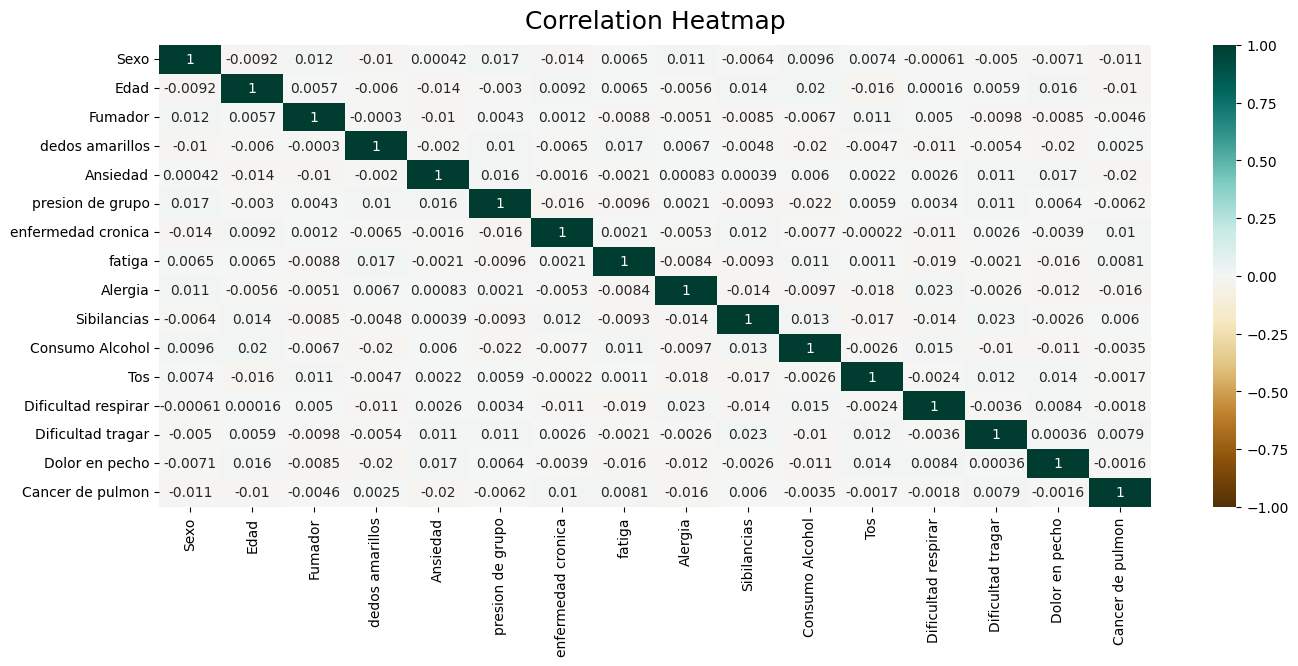

In [41]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

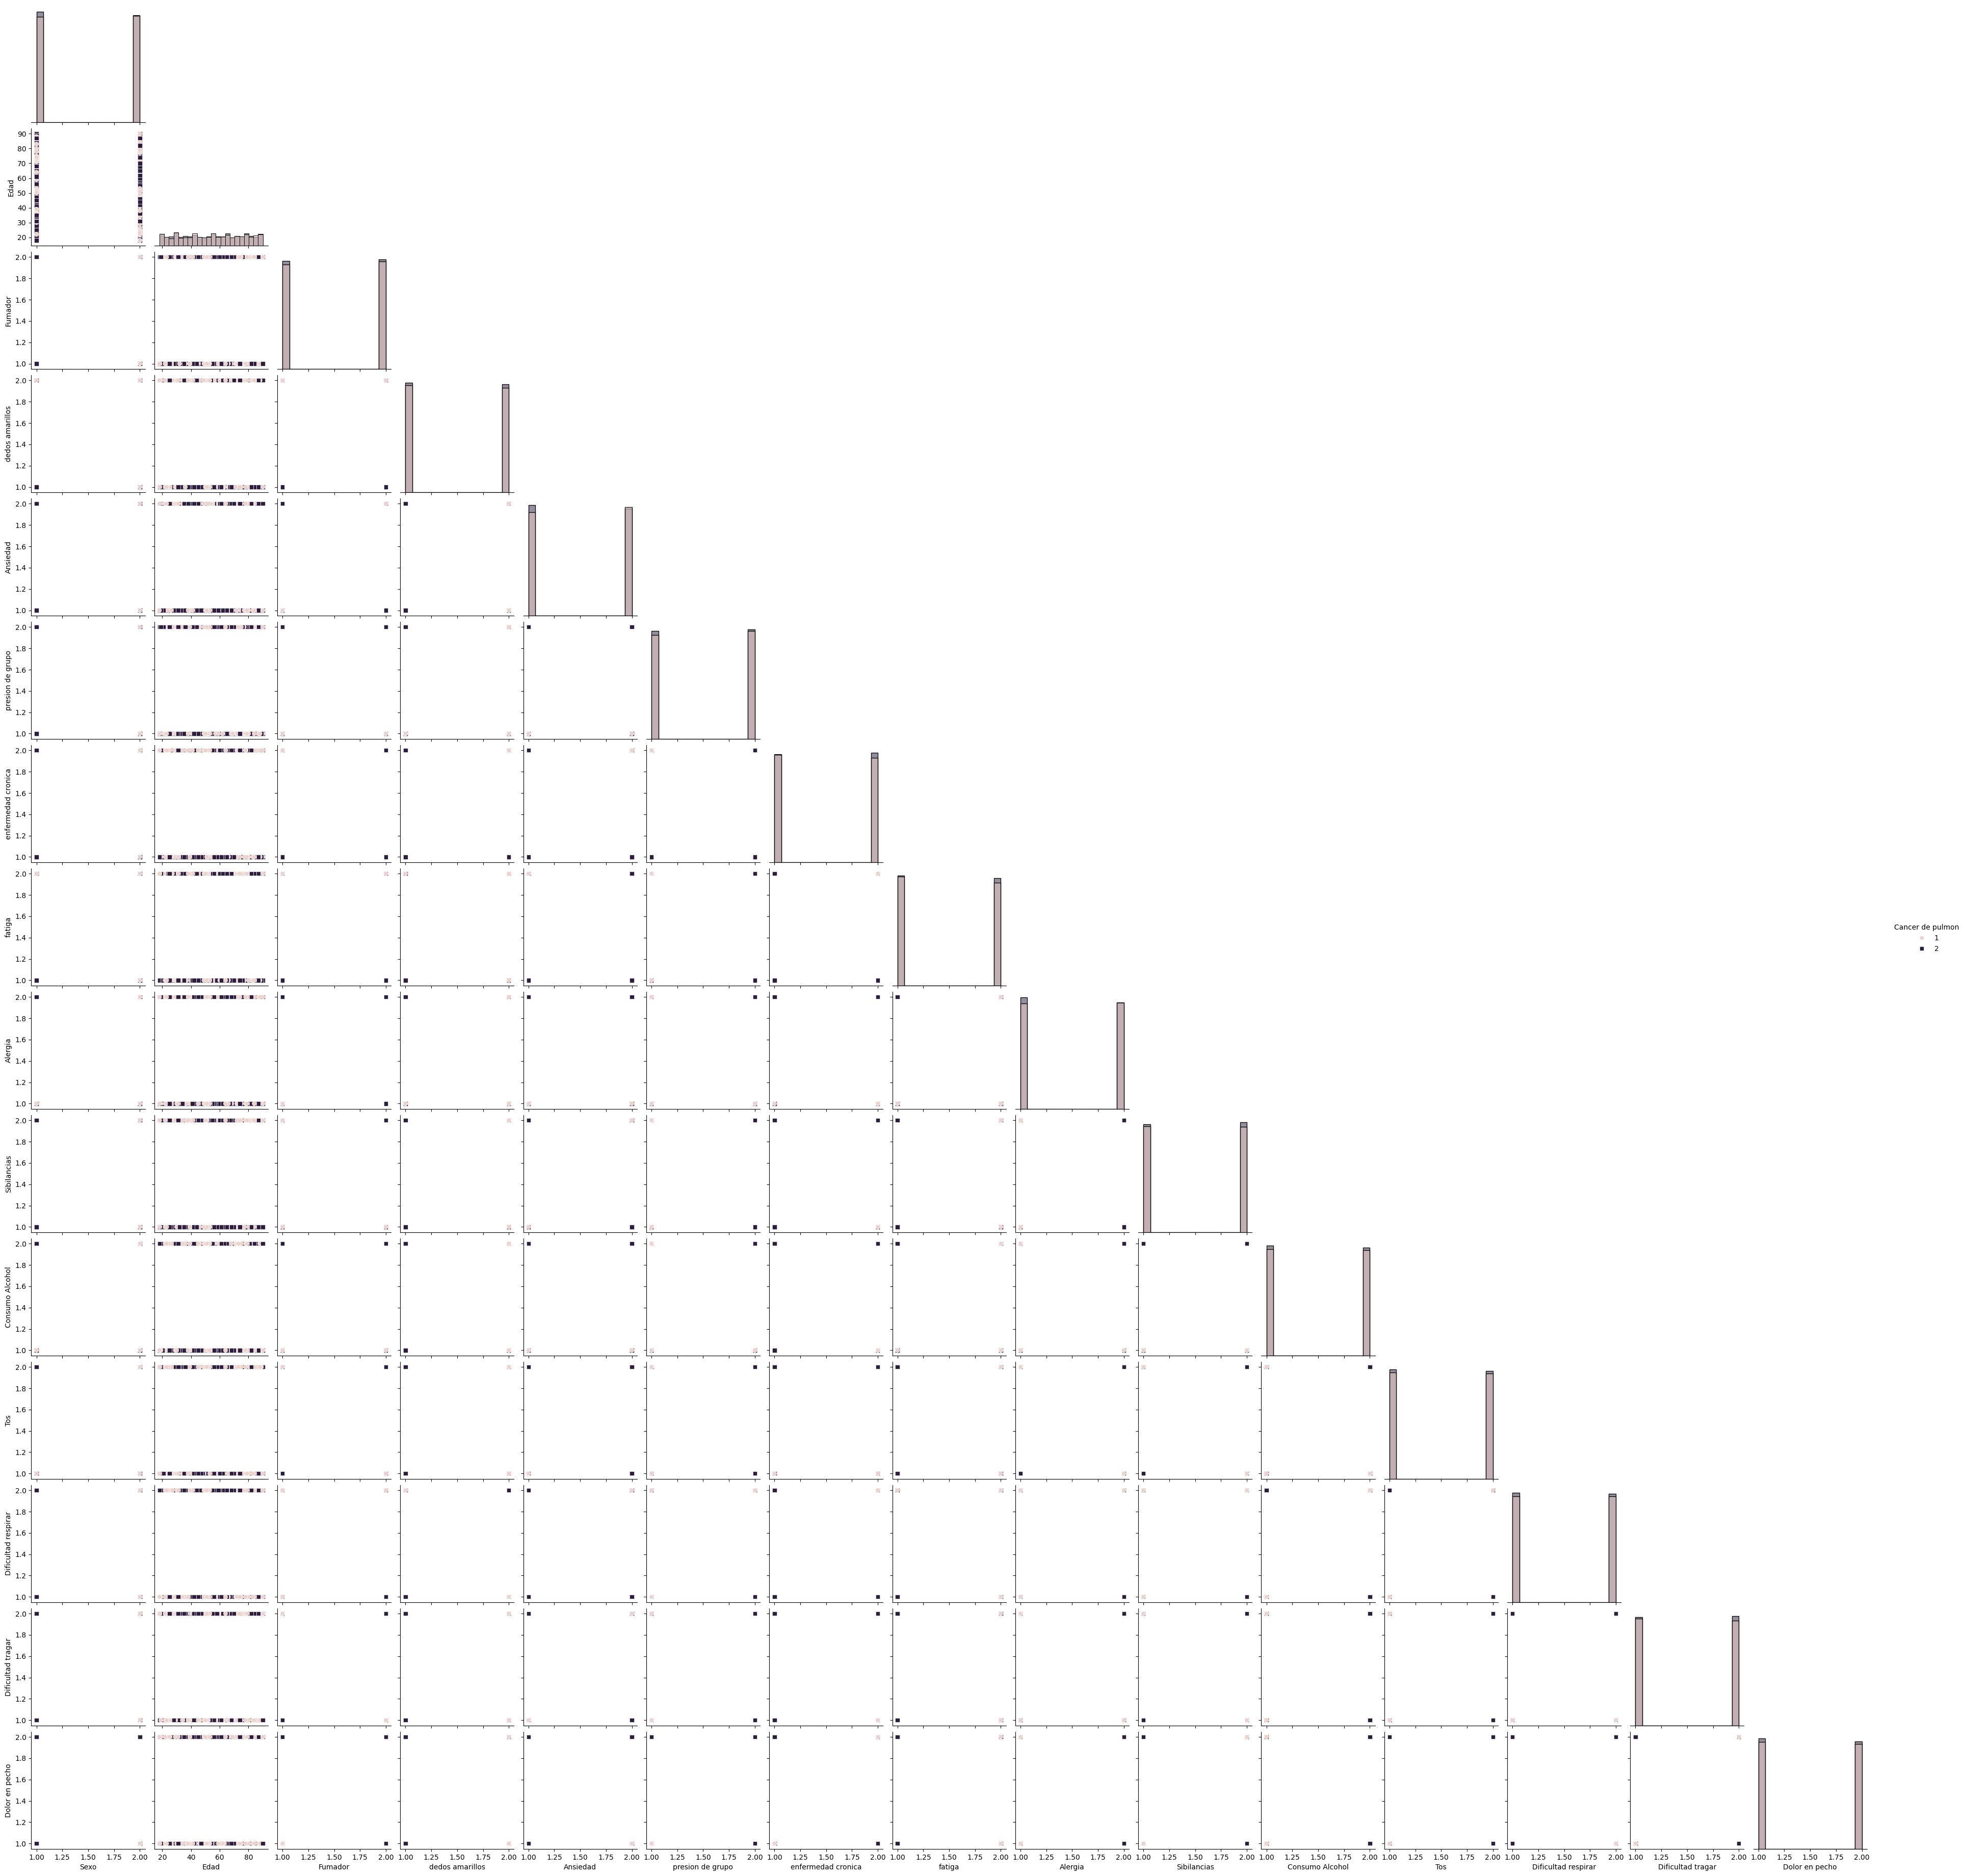

In [42]:
sns.pairplot(df_filtered, hue="Cancer de pulmon", diag_kind="hist", markers=["o", "s"], corner=True)

## Feature Engineering ##

### Aproach 1 - One hot encoding ###

In [43]:
df_one_hot_coding = df_filtered.copy()

In [44]:
df_one_hot_coding = pd.get_dummies(df_one_hot_coding, columns=['Sexo', 'Fumador', 'dedos amarillos', 'Ansiedad',
       'presion de grupo', 'enfermedad cronica', 'fatiga', 'Alergia',
       'Sibilancias', 'Consumo Alcohol', 'Tos', 'Dificultad respirar',
       'Dificultad tragar', 'Dolor en pecho', 'Cancer de pulmon'])

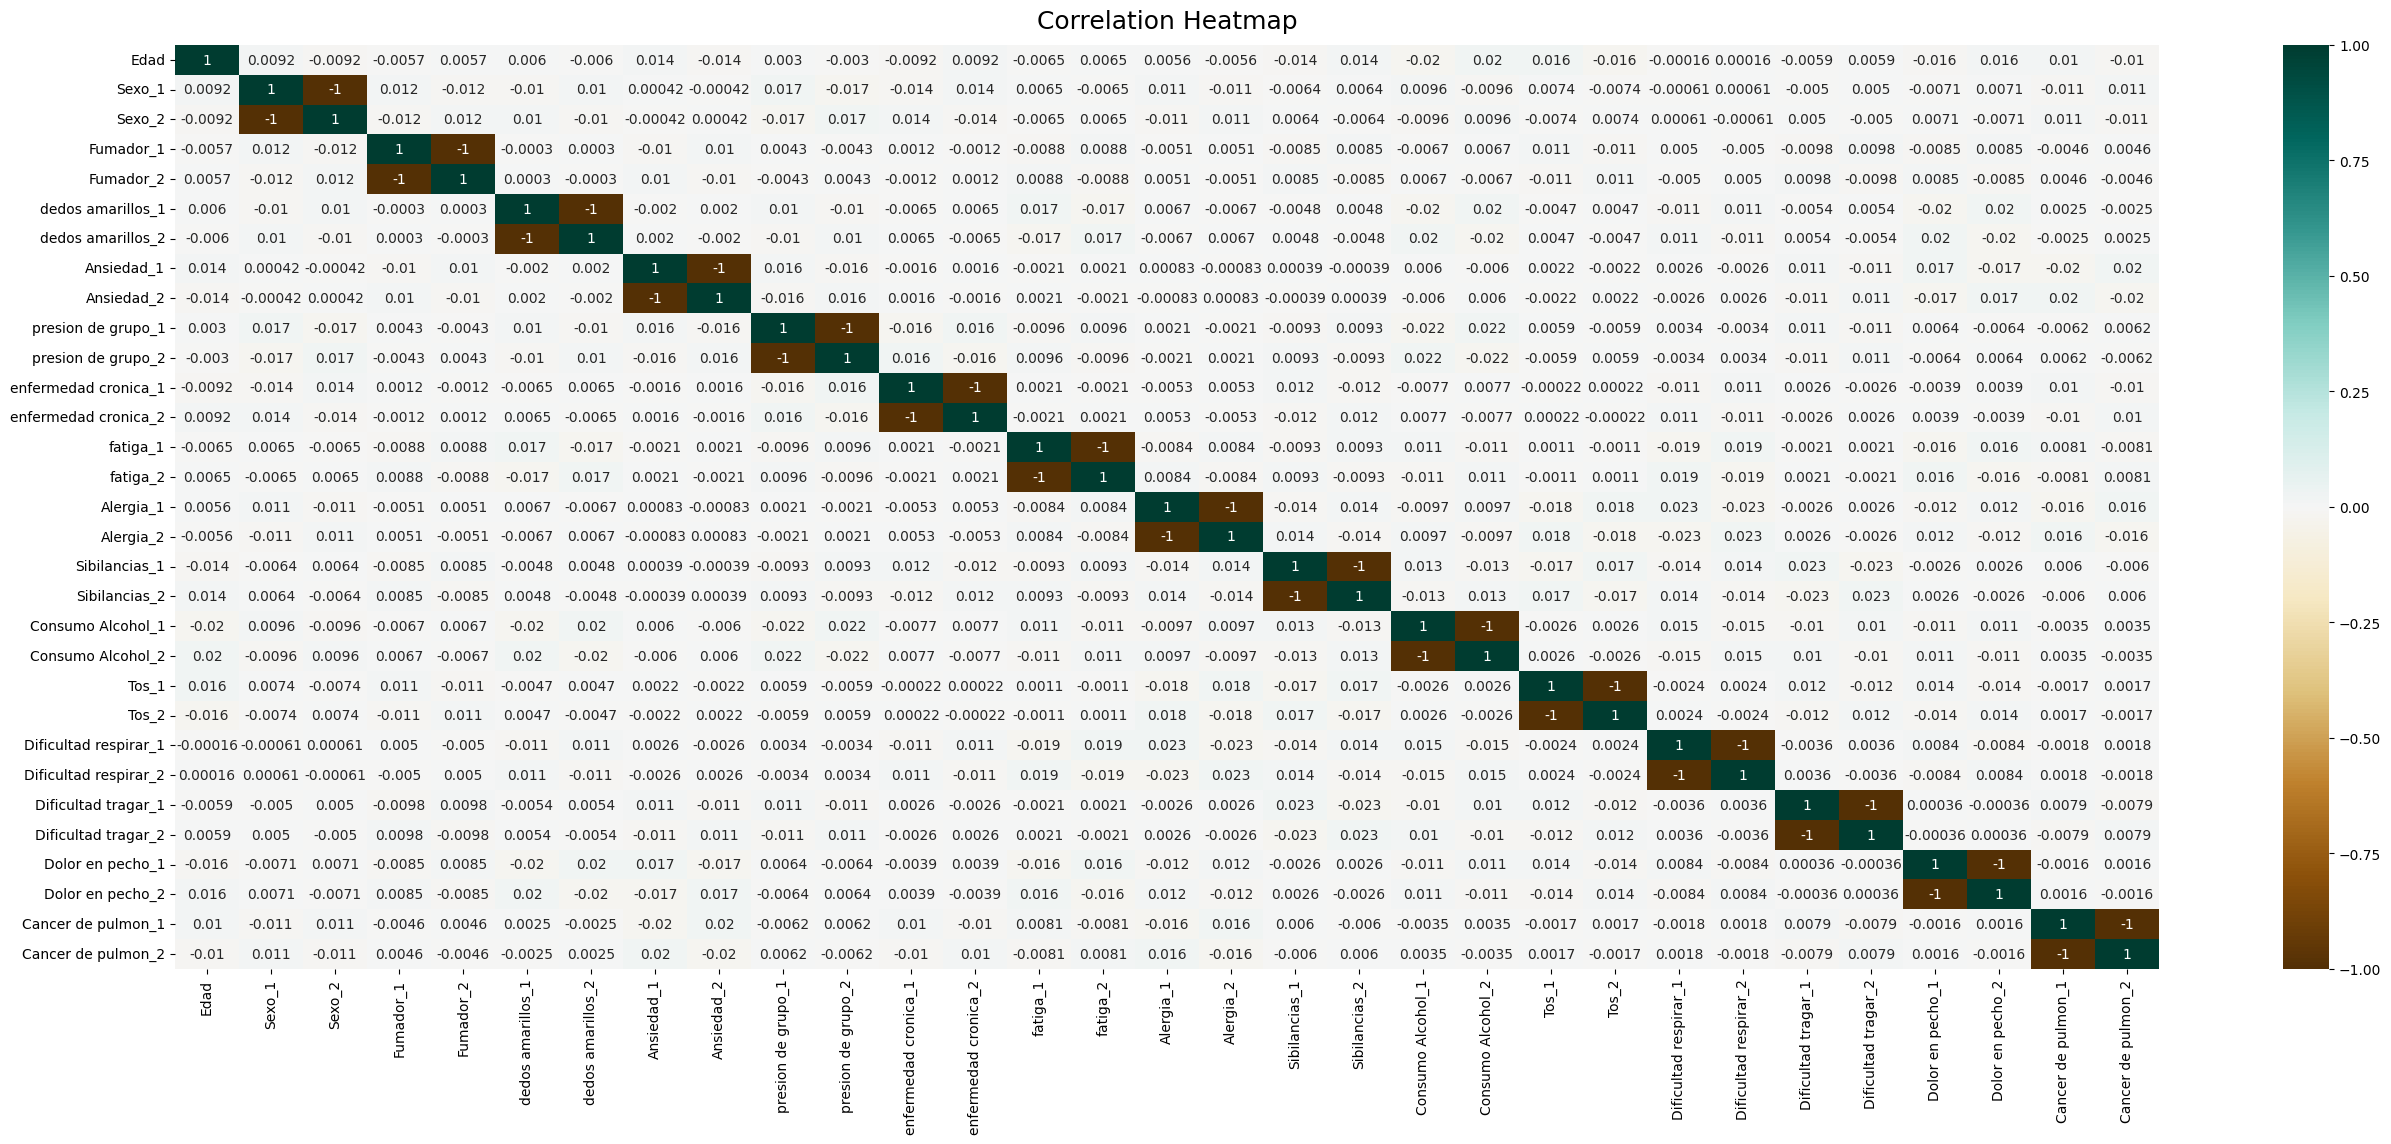

In [45]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(df_one_hot_coding.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Approach 2 - One hot enconding and saling the numerical features ###

In [46]:
df_approach_2 = df_filtered.copy()

In [47]:
categorical_cols = ['Sexo', 'Fumador', 'Alergia', 'Sibilancias', 'Consumo Alcohol', 'Tos', 'Dificultad respirar', 'Dificultad tragar', 'Dolor en pecho', 'Cancer de pulmon']

In [48]:
df_approach_2 = pd.get_dummies(df_approach_2, columns=categorical_cols)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
numerical_cols = ['Edad', 'Ansiedad', 'presion de grupo', 'enfermedad cronica', 'fatiga']

In [51]:
scaler = StandardScaler()

In [52]:
df_approach_2[numerical_cols] = scaler.fit_transform(df_approach_2[numerical_cols])

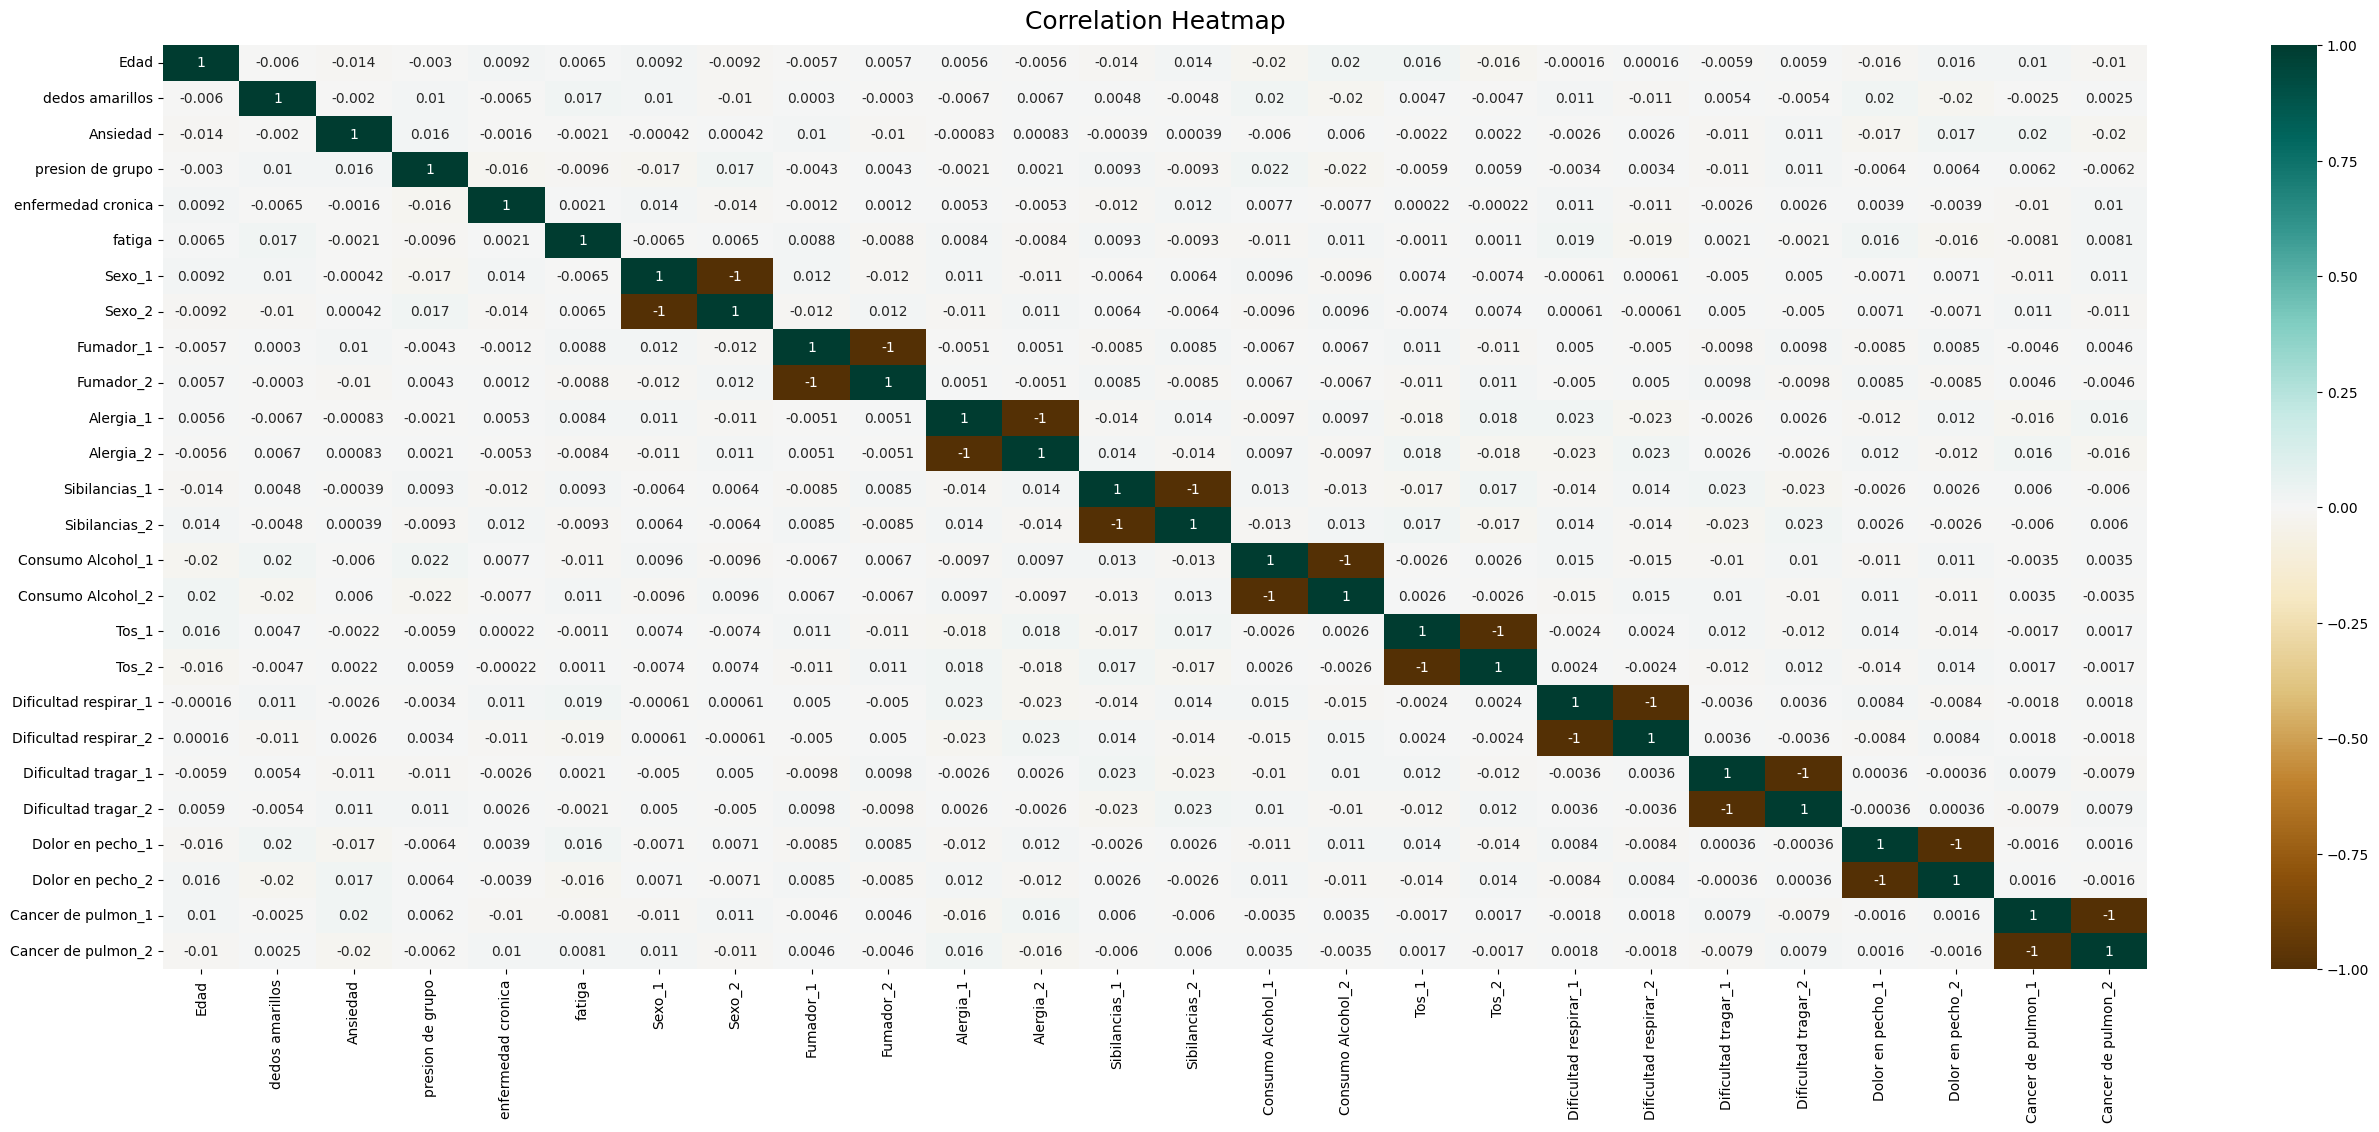

In [53]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(df_approach_2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Aproach 3 - Feature Selection ###

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [55]:
df_approach_3 = df_filtered.copy()

In [56]:
rf = RandomForestClassifier(random_state=42)

In [57]:
rfe = RFE(estimator=rf, n_features_to_select=5, step=1)

In [58]:
X = df_approach_3.drop('Cancer de pulmon', axis=1)
y = df_approach_3['Cancer de pulmon']
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)

In [59]:
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['Edad', 'Sibilancias', 'Consumo Alcohol', 'Dificultad tragar',
       'Dolor en pecho'],
      dtype='object')


In [60]:
df_3 = df_approach_3[['Edad', 'Sibilancias', 'Consumo Alcohol', 'Dificultad tragar',
       'Dolor en pecho', 'Cancer de pulmon']]

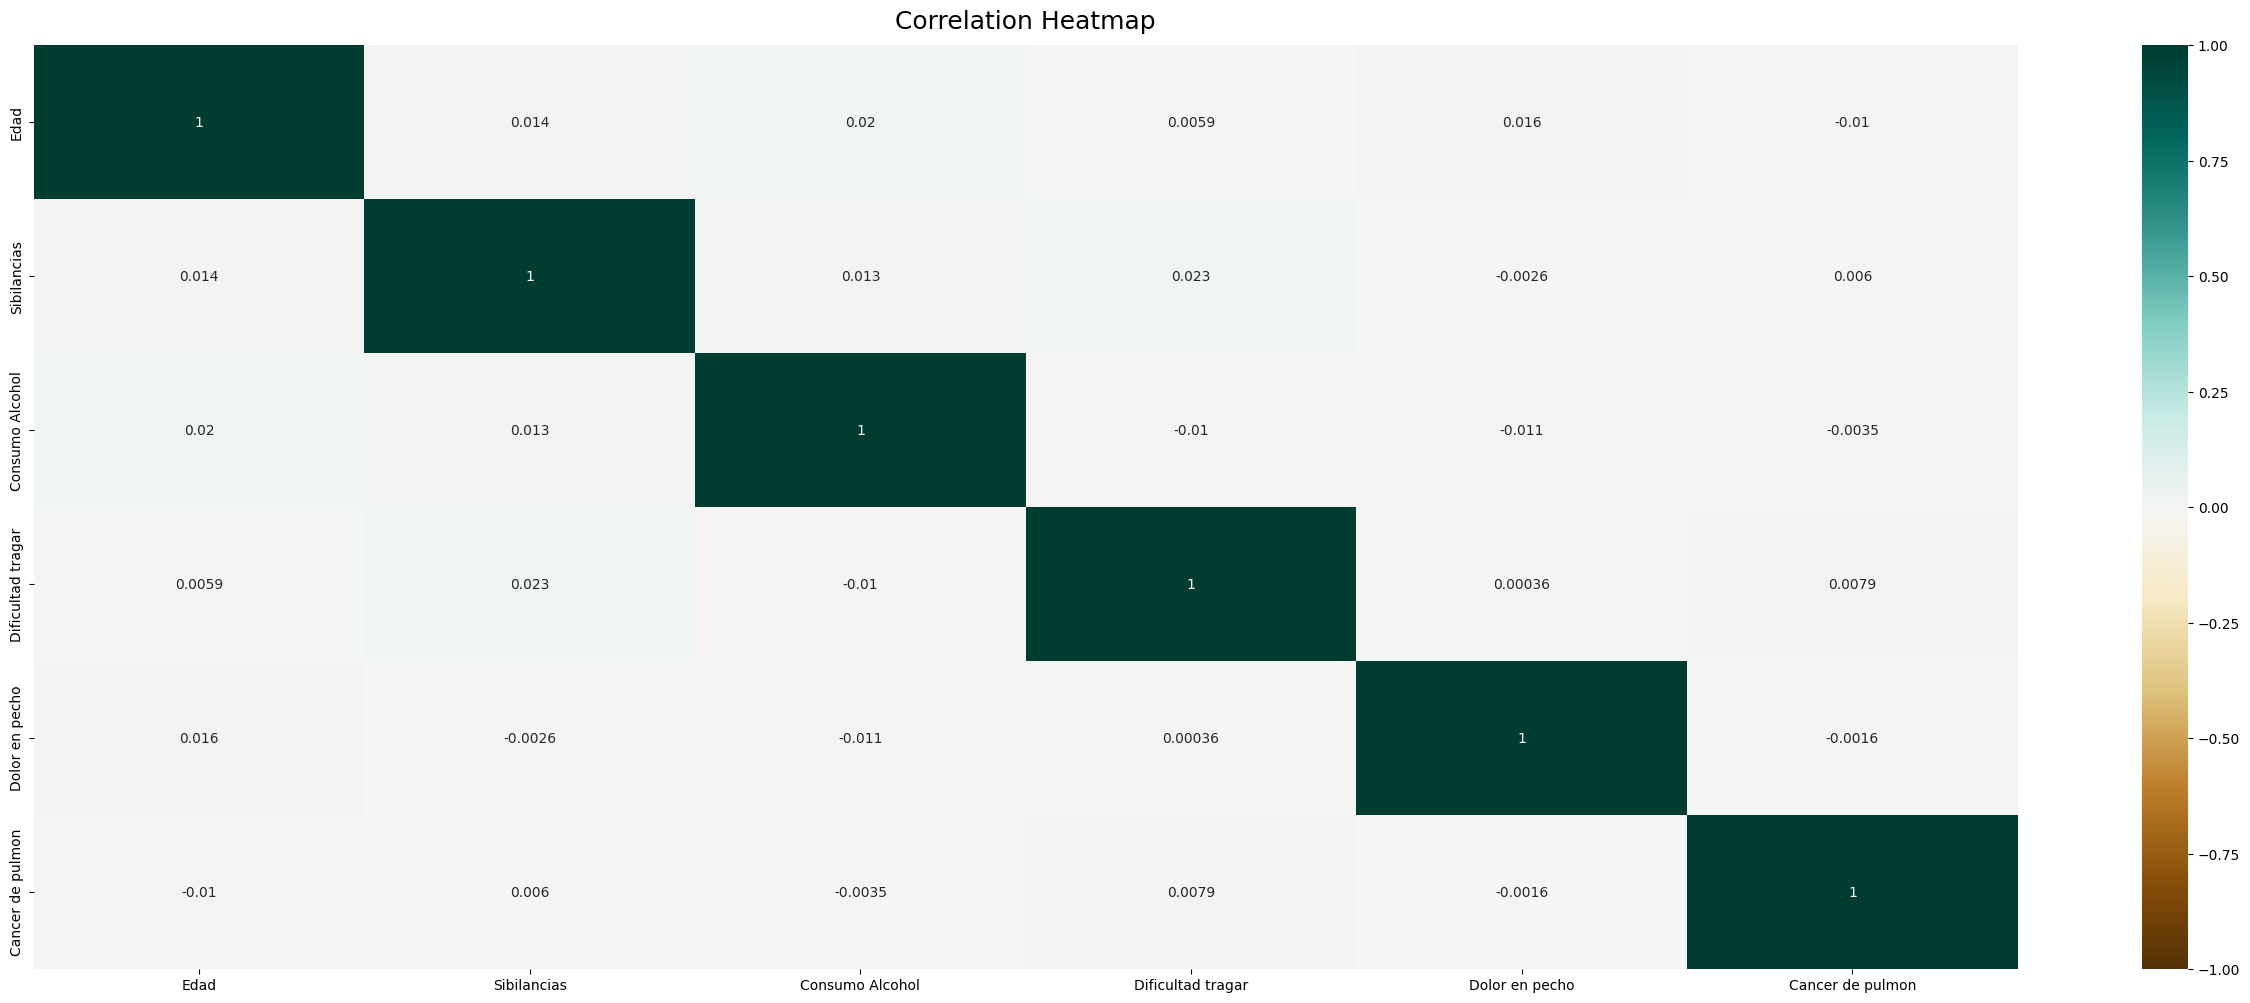

In [61]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(df_3.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# Save the filter data for the models.ipynb #

In [70]:
df.to_csv('datasets/respuestas_filtered.csv', index=False, sep=',', header=True, encoding='utf-8')